In [1]:
from astropy.coordinates import SkyCoord, EarthLocation
from Helper_funcs import *
from Scheduler import *
import astropy.coordinates as coord
import astropy.units as u
from tabulate import tabulate
from astropy.time import Time
import sqlite3
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime as dt

wind10toast not installed
plyer not installed


In [2]:
connect = sqlite3.connect('Database.db')
add_randome_data(10)
cont = sqlite_retrieve_table(connect, 'Schedule')

INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M1', 'True', 'Public', '58', '12', '21-02-2021', '23-12-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M2', 'False', 'Staff', '83', '7', '18-03-2020', '22-12-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M3', 'False', 'Student', '92', '57', '19-08-2020', '12-07-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M4', 'False', 'Student', '4', '32', '25-10-2020', '28-11-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M5', 'False', 'Moderator', '55', '47', '17-01-2021', '0

In [3]:
print('({:}, {:}, {:}, {:}, {:}, {:}, {:}, {:})'.format(*[key for key in cont[0]]))
print('| {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} |'.format(*[key for key in cont[0]]))
print('-'*185)
for i in range(len(cont)):
    print('| {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} |'.format(*[cont[i][key] for key in cont[i]]))

(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority)
| object               | time_sensitive       | Observer_type        | Rarity               | total_length         | Submission_Date      | Completed_by         | priority             |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| M1                   | True                 | Public               |                   58 |                   12 | 21-02-2021           | 23-12-2021           | None                 |
| M2                   | False                | Staff                |                   83 |                    7 | 18-03-2020           | 22-12-2021           | None                 |
| M3                   | False                | Student              |                   92 |                   57 | 19-08-2020           | 12-07-2021   

2021-07-10 20:00:49 2021-07-10 23:50:49
2021-07-10 20:00:49 2021-07-10 23:50:49
2021-07-10 20:00:49 2021-07-10 23:50:49
2021-07-10 20:00:49 2021-07-10 23:50:49
2021-07-10 20:00:49 2021-07-10 23:20:49
2021-07-10 20:00:49 2021-07-10 21:00:49
2021-07-10 20:00:49 2021-07-10 23:50:49
2021-07-10 20:00:49 2021-07-10 23:50:49
{'object': 'M1', 'time_sensitive': 'True', 'Observer_type': 'Outreach/schools', 'Rarity': 55, 'total_length': 112, 'Submission_Date': '05-03-2020', 'Completed_by': '05-12-2021', 'priority': 5.0, 'obs_id': 1, 'min_cond': {}, 'Possible': False}
2021-07-10 20:00:49 2021-07-10 22:20:49


In [4]:
objects = daily_Schedule('Database.db', 'Schedule')
for i in range(len(objects)):
    objects[i]['min_cond'] = {}
    

In [5]:

objects,schedule = night_schedule(objects)

In [6]:
print(tabulate([[objects[i][key] for key in objects[i]] for i in range(len(objects))], headers=[key for key in objects[0]]))

object    time_sensitive    Observer_type       Rarity    total_length  Submission_Date    Completed_by      priority    obs_id  min_cond    Possible    Obs_time
--------  ----------------  ----------------  --------  --------------  -----------------  --------------  ----------  --------  ----------  ----------  ------------------------------------------------------------------------------------------------------------------------------------------------
M3        False             Student                 92              57  19-08-2020         12-07-2021           104.6         3  {}          True        [<Time object: scale='utc' format='isot' value=2021-07-10T20:00:49.000>, <Time object: scale='utc' format='isot' value=2021-07-10T21:00:49.000>]
M5        False             Moderator               55              47  17-01-2021         01-09-2021            54.1         5  {}          True        [<Time object: scale='utc' format='isot' value=2021-07-10T20:00:49.000>, <Time object: sc

In [7]:
print(schedule)

{datetime.datetime(2021, 7, 10, 20, 0, 49): 3, datetime.datetime(2021, 7, 10, 20, 10, 49): 3, datetime.datetime(2021, 7, 10, 20, 20, 49): 3, datetime.datetime(2021, 7, 10, 20, 30, 49): 3, datetime.datetime(2021, 7, 10, 20, 40, 49): 3, datetime.datetime(2021, 7, 10, 20, 50, 49): 3, datetime.datetime(2021, 7, 10, 21, 0, 49): 3, datetime.datetime(2021, 7, 10, 21, 10, 49): 5, datetime.datetime(2021, 7, 10, 21, 20, 49): 5, datetime.datetime(2021, 7, 10, 21, 30, 49): 5, datetime.datetime(2021, 7, 10, 21, 40, 49): 5, datetime.datetime(2021, 7, 10, 21, 50, 49): 5, datetime.datetime(2021, 7, 10, 22, 0, 49): 10, datetime.datetime(2021, 7, 10, 22, 10, 49): 10, datetime.datetime(2021, 7, 10, 22, 20, 49): 10, datetime.datetime(2021, 7, 10, 22, 30, 49): 10, datetime.datetime(2021, 7, 10, 22, 40, 49): 10, datetime.datetime(2021, 7, 10, 22, 50, 49): 10, datetime.datetime(2021, 7, 10, 23, 0, 49): 10, datetime.datetime(2021, 7, 10, 23, 10, 49): 6, datetime.datetime(2021, 7, 10, 23, 20, 49): 6, datetime.

<Figure size 864x864 with 0 Axes>

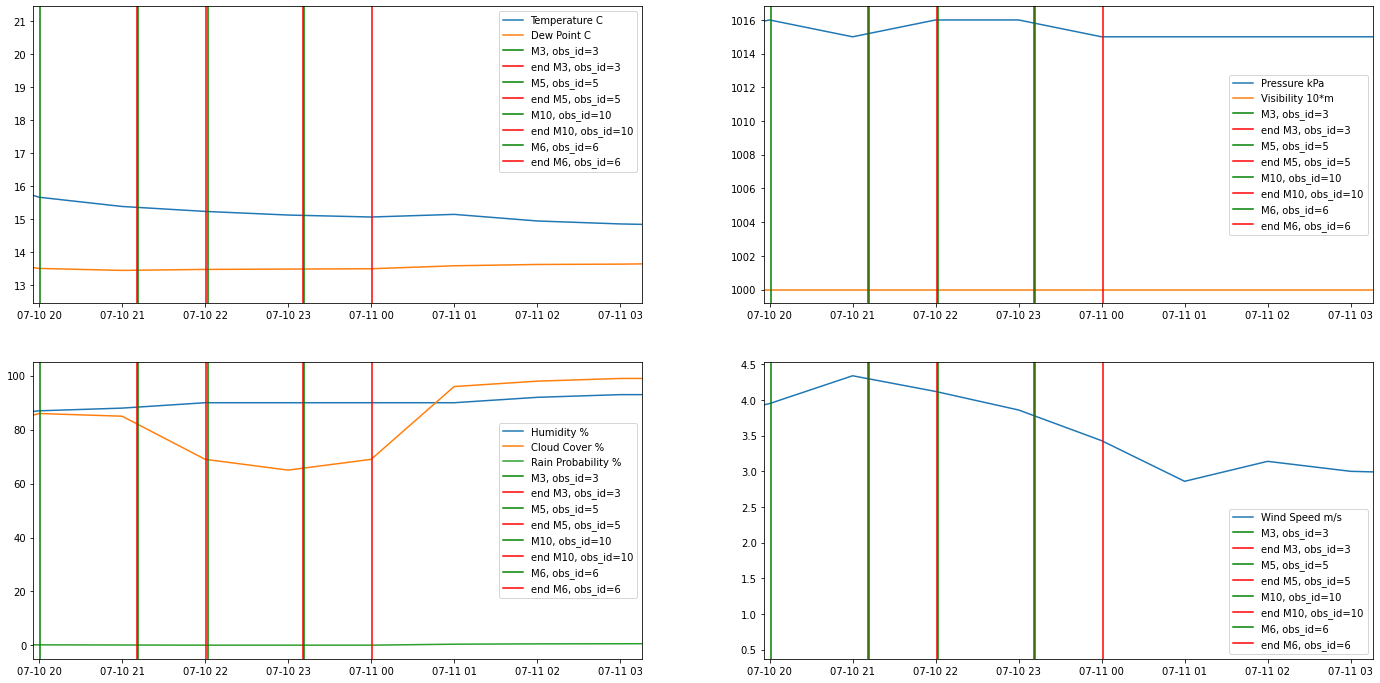

In [11]:
weather = get_predicted_conditions()
make_plot(objects, schedule,weather)